# Trabalho Prático Integrador 3

### Enunciado

Neste Trabalho Prático os alunos devem escolher com qual conjunto de dados trabalhar para resolver um problema de classificação com alguns dos modelos apresentados no curso.

Objetivos:
* Selecionar os dados para modelar. Justificar a escolha.
* Treinar pelo menos três modelos de classificação diferentes nesses dados.
* Avaliar o desempenho dos modelos e comparar vantagens e desvantagens de cada um.
* Determinar a importância dos recursos incluídos na previsão. Interpretar.

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

### Importando a base de dados

In [2]:
Data = pd.read_csv('Data/water_potability.csv')
Data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
Data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Renomeando as colunas para o Português

In [4]:
Data = Data.rename(columns={'Hardness' :  'Dureza',
                     'Solids'          :  'Sólidos',
                     'Chloramines'     :  'Cloraminas',
                     'Sulfate'         :  'Sulfato',
                     'Conductivity'    :  'Condutividade',
                     'Organic_carbon'  :  'Carbono organico',
                     'Trihalomethanes' :  'Trialometanos',
                     'Turbidity'       :  'Turbidez',
                     'Potability'      :  'Potabilidade'})

Data.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez,Potabilidade
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Verificando se há valor nulo

* Achamos um valor com ph valendo 0, portanto substituimos ele para ficar NaN e a gente filtrar junto com todos os outros NaN

In [5]:
a = Data.ph
a.replace(0,np.NaN,inplace = True)


In [6]:
Data.isnull().sum()

ph                  492
Dureza                0
Sólidos               0
Cloraminas            0
Sulfato             781
Condutividade         0
Carbono organico      0
Trialometanos       162
Turbidez              0
Potabilidade          0
dtype: int64

In [7]:
(Data.isnull().sum()/len(Data))*100

#porcentagem de NaN

ph                  15.018315
Dureza               0.000000
Sólidos              0.000000
Cloraminas           0.000000
Sulfato             23.840049
Condutividade        0.000000
Carbono organico     0.000000
Trialometanos        4.945055
Turbidez             0.000000
Potabilidade         0.000000
dtype: float64

### Limpando o dataset

* Para substituir todos os NaN, nós dividimos o dataset original em dois dataframes: um com a potabilidade igual a um e outro com a potabilidade igual a zero. Nos dois, nós pegamos o valor correspondente a mediana menos o valor mínimo de cada feature que a gente queria alterar. E logo depois concatenamos os dois dataframes e fizemos um dataset para analisar, sem nenhum NaN

 * ***Algumas observações:***

* De acordo com a Agência de Proteção Ambiental (EPA), o valor máximo de Trialometano permitido na água é de100ug/L e 66.4mg/l. (<http://sanepar.com.br/sanepar/sanare/v17/TRIHALOMETANOS.htm>)

* De acordo com o Ministério da Saúde, o valor máximo de Sulfato na água é de 250mg/L. (<https://bvsms.saude.gov.br/bvs/saudelegis/gm/2004/prt0518_25_03_2004.html>)

* A recomendação é que o Ph esteja de 6 à 9.5

----

* Analisando a mediana menos o valor mínimo de trialometano

In [8]:
p1t = Data[Data.Potabilidade == 1]
p1t.Trialometanos.describe()
p1t.Trialometanos.median() - p1t.Trialometanos.min()

58.50233732573724

In [9]:
p0t = Data[Data.Potabilidade == 0]
p0t.Trialometanos.describe()
p0t.Trialometanos.median() - p0t.Trialometanos.min()

65.80419804427565

----

* Analisando a mediana menos o valor mínimo de sulfato

In [10]:
p1s = Data[Data.Potabilidade == 1]
p1s.Sulfato.describe()
p1s.Sulfato.median() - p1s.Sulfato.min()

202.83816712957415

In [11]:
p0s = Data[Data.Potabilidade == 0]
p0s.Sulfato.describe()
p0s.Sulfato.median() - p0s.Sulfato.min()

129.94490532753582

----

* Analisando a mediana menos o valor mínimo de ph

In [12]:
p1p = Data[Data.Potabilidade == 1]
p1p.ph.describe()
p1p.ph.median() - p1p.ph.min()

6.809253053631349

In [13]:
p0s = Data[Data.Potabilidade == 0]
p0s.ph.describe()
p0s.ph.median() - p0s.ph.min()

6.062514315780879

* Substituindo os NaN :

In [14]:
df = Data[Data.Potabilidade==1]
df.Trialometanos.fillna(value = df.Trialometanos.median() - df.Trialometanos.min(), inplace=True)
df.Sulfato.fillna(value = df.Sulfato.median() - df.Sulfato.min(), inplace=True)
df.ph.fillna(value = df.ph.median() - df.ph.min(), inplace=True)
dff = Data[Data.Potabilidade==0]
dff.Trialometanos.fillna(value = dff.Trialometanos.median() - dff.Trialometanos.min(), inplace=True)
dff.Sulfato.fillna(value = dff.Sulfato.median() - dff.Sulfato.min(), inplace=True)
dff.ph.fillna(value = dff.ph.median() - dff.ph.min(), inplace=True)
Data = pd.concat([df,dff],axis = 0)
Data

C:\Users\RedRagon\AppData\Local\Temp\ipykernel_18632\45618044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Trialometanos.fillna(value = df.Trialometanos.median() - df.Trialometanos.min(), inplace=True)
C:\Users\RedRagon\AppData\Local\Temp\ipykernel_18632\45618044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sulfato.fillna(value = df.Sulfato.median() - df.Sulfato.min(), inplace=True)
C:\Users\RedRagon\AppData\Local\Temp\ipykernel_18632\45618044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez,Potabilidade
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,6.809253,169.974849,23403.637304,8.519730,202.838167,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,129.944905,417.465080,13.432557,47.945936,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,129.944905,395.114961,15.033557,92.697369,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [15]:
Data.isnull().sum()

ph                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfato             0
Condutividade       0
Carbono organico    0
Trialometanos       0
Turbidez            0
Potabilidade        0
dtype: int64

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 250 to 3116
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ph                3276 non-null   float64
 1   Dureza            3276 non-null   float64
 2   Sólidos           3276 non-null   float64
 3   Cloraminas        3276 non-null   float64
 4   Sulfato           3276 non-null   float64
 5   Condutividade     3276 non-null   float64
 6   Carbono organico  3276 non-null   float64
 7   Trialometanos     3276 non-null   float64
 8   Turbidez          3276 non-null   float64
 9   Potabilidade      3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


Analisando o Dataset depois de tirar os NaN

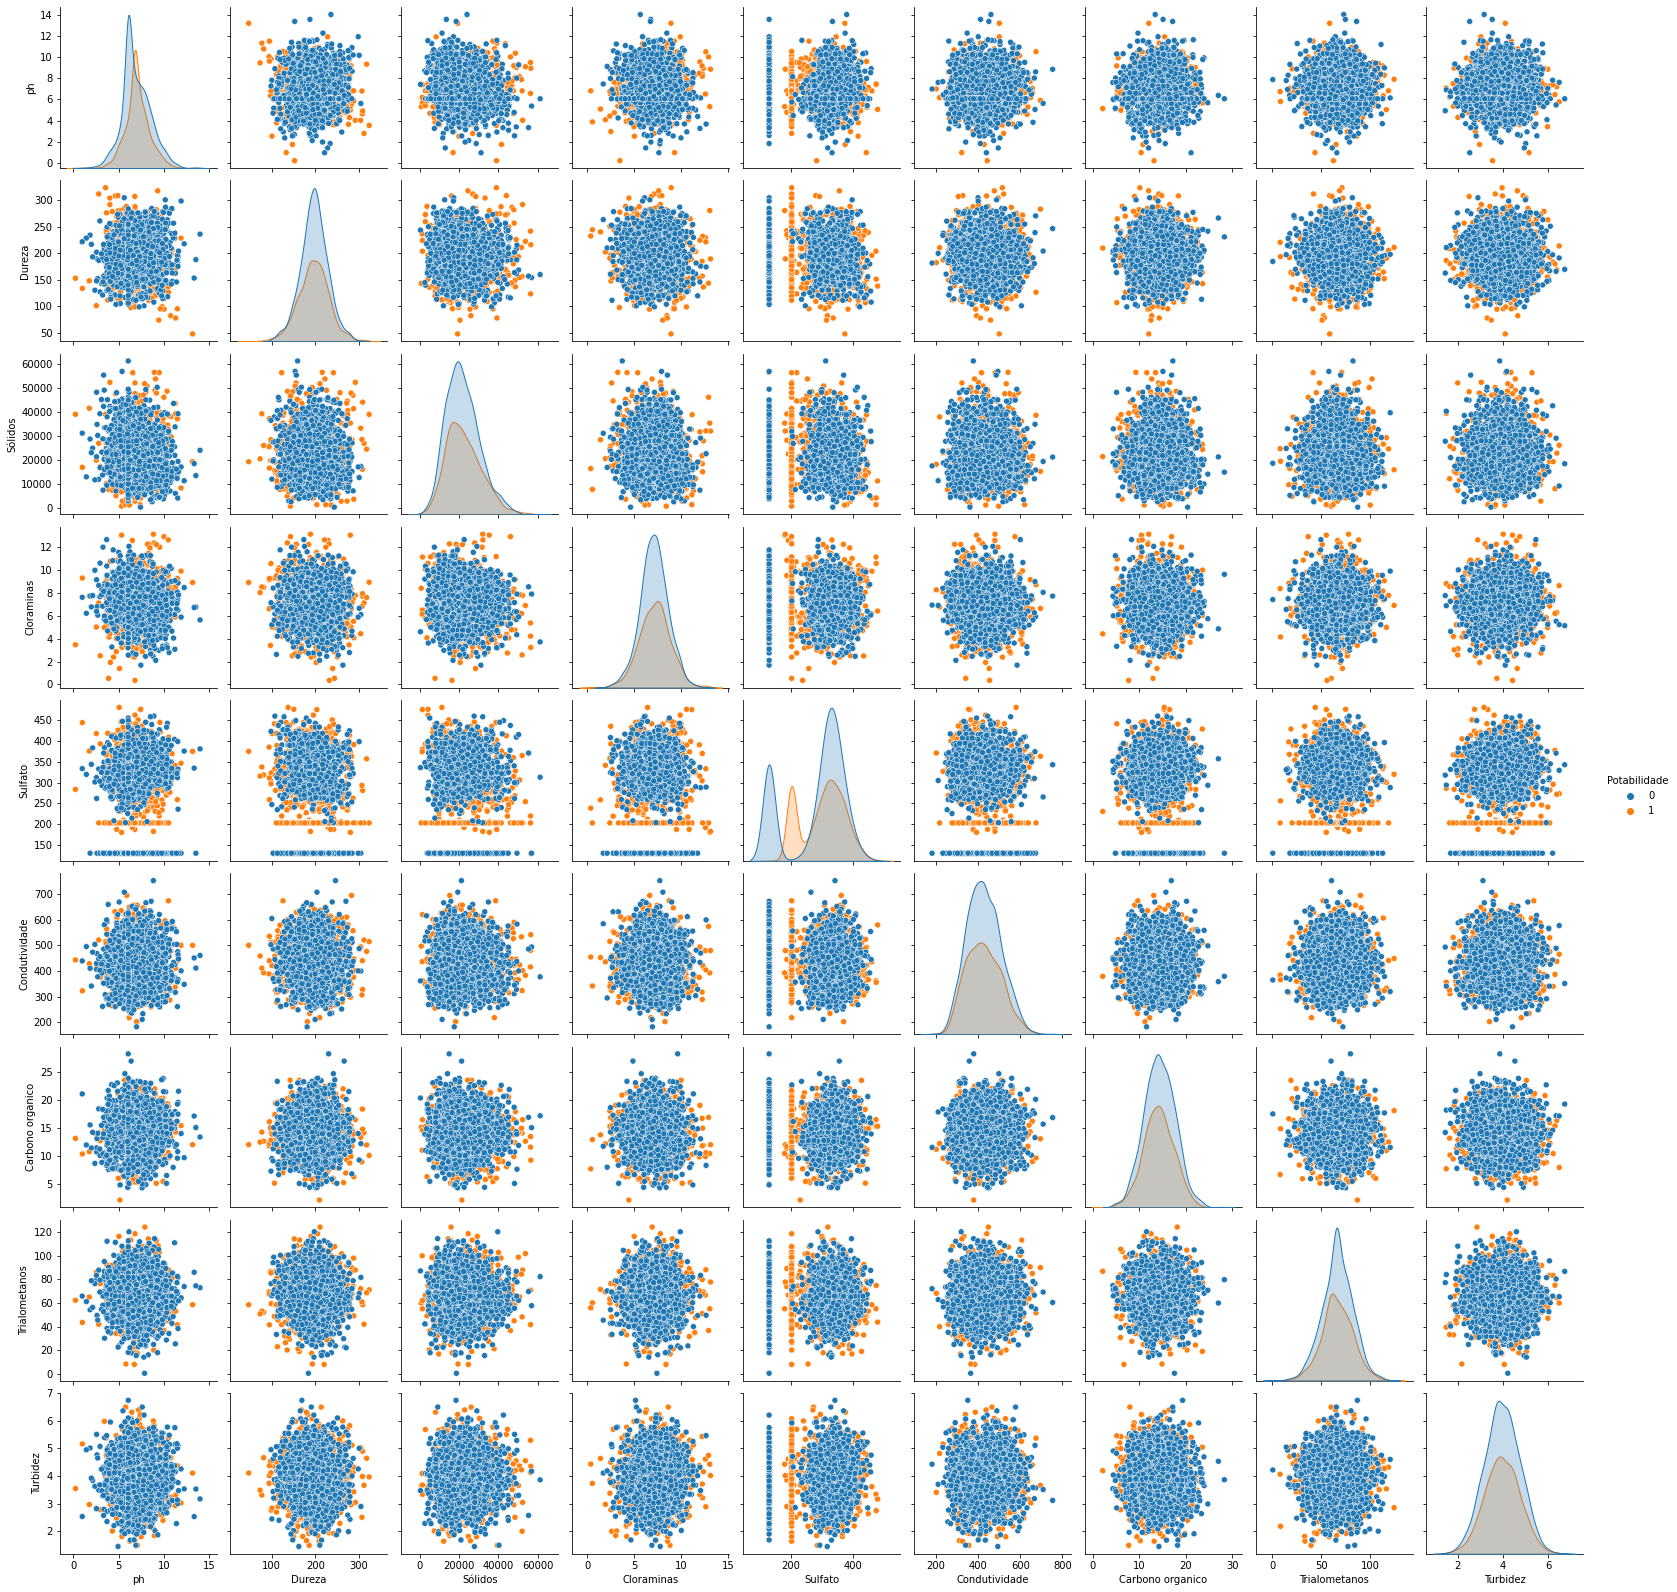

In [17]:
sns.pairplot(Data, hue ='Potabilidade')

<AxesSubplot:>

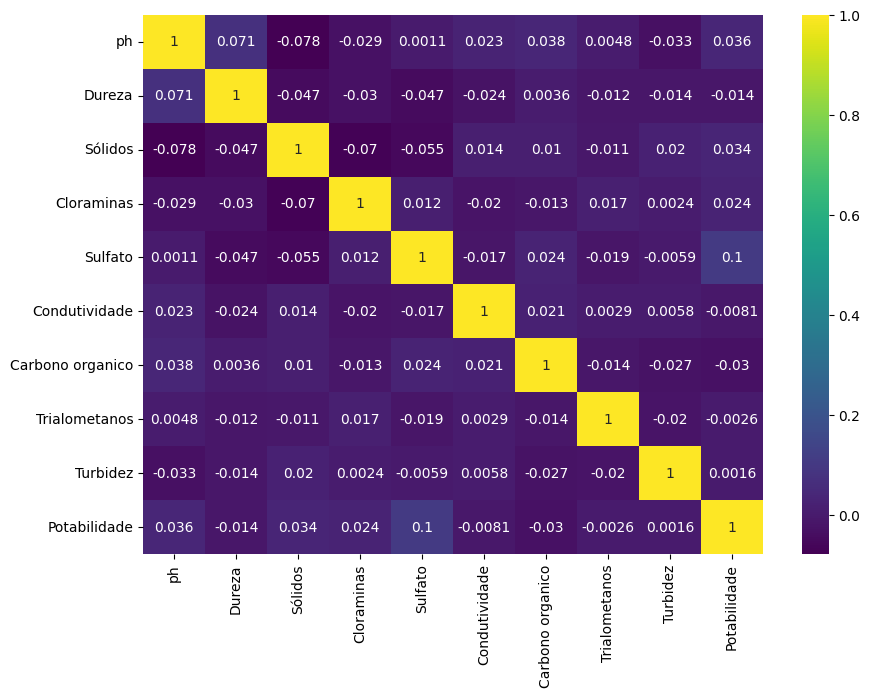

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(Data.corr(),annot=True,cmap='viridis')

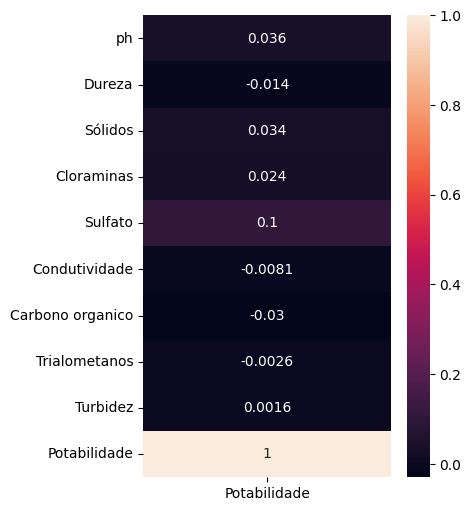

In [19]:
plt.figure(figsize = (4,6))
sns.heatmap(Data.corr()[['Potabilidade']], 
            annot = True
           );

### Aplicando os Modelos de Classificação

##### KNN (K Neighbors Classifier)

In [20]:
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez
250,1.654884,-1.538083,-1.008935,1.467103,0.221630,2.059774,-1.716796,0.717269,-0.117423
251,1.373837,-2.076756,-0.245735,0.564899,0.099168,0.308598,0.146899,0.476803,0.023664
252,-0.107742,-0.802885,0.158493,0.882875,-1.043076,0.610907,-0.411428,-0.973561,-1.562900
253,-0.113850,1.388257,1.953788,1.503255,-1.226979,-0.615610,-0.862394,0.476755,-0.143344
254,0.136257,0.214129,-0.183979,0.353496,-0.054184,-1.369296,0.075141,0.516523,-0.034463


In [21]:
# separa em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('Há', y_train.shape[0], 'dados de treino e', y_test.shape[0], 'dados de teste')

Há 2194 dados de treino e 1082 dados de teste


In [22]:
# instanciamos o modelo especificando o valor desejado de k com o argumento n_neighbors
knn = KNeighborsClassifier(n_neighbors = 19)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [24]:
y_pred =  knn.predict(X_test)

In [25]:
# obtemos a matriz de confusão
MCKNN = confusion_matrix(y_test, y_pred)
MCKNN

array([[575,  59],
       [297, 151]], dtype=int64)

In [26]:
KNN = round(accuracy_score(y_test, y_pred),2)
KNN

0.67

In [27]:
score_knn = cross_val_score(knn, X, y, cv = 10)
score_knn

array([0.67987805, 0.66768293, 0.67987805, 0.70121951, 0.68902439,
       0.6097561 , 0.63302752, 0.65443425, 0.65137615, 0.6911315 ])

<AxesSubplot:>

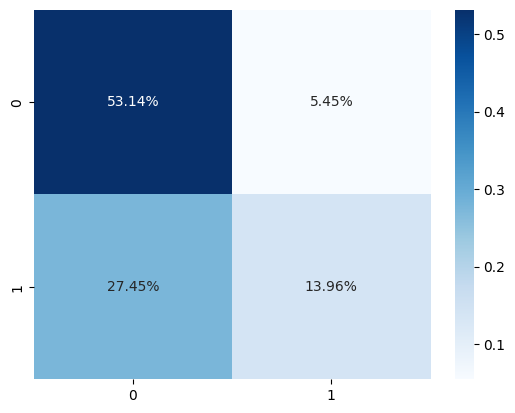

In [28]:
KNN_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       634
           1       0.72      0.34      0.46       448

    accuracy                           0.67      1082
   macro avg       0.69      0.62      0.61      1082
weighted avg       0.68      0.67      0.64      1082



In [30]:
precision_knn = 0.72
recall_knn = 0.34
f1_score_knn = 0.46

* precision: Porcentagem de previsões positivas corretas em relação ao total de previsões positivas
* recall: Porcentagem de previsões positivas corretas em relação ao total de positivos reais.
* f1-score: Uma média harmônica ponderada de precisão e recall. Quanto mais próximo de 1, melhor o modelo.

1. O Modelo previu que 72% das amostras de água são potáveis;
2. De todos as amostras de água que realmente era potável, o modelo só previu esse resultado corretamente para 34% deles;
3. F1-score = 0.46, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não;
4. 634 amostras de água não são potáveis e 448 são potáveis nos dados de teste.

##### Naive Bayes

In [31]:
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez
250,1.654884,-1.538083,-1.008935,1.467103,0.221630,2.059774,-1.716796,0.717269,-0.117423
251,1.373837,-2.076756,-0.245735,0.564899,0.099168,0.308598,0.146899,0.476803,0.023664
252,-0.107742,-0.802885,0.158493,0.882875,-1.043076,0.610907,-0.411428,-0.973561,-1.562900
253,-0.113850,1.388257,1.953788,1.503255,-1.226979,-0.615610,-0.862394,0.476755,-0.143344
254,0.136257,0.214129,-0.183979,0.353496,-0.054184,-1.369296,0.075141,0.516523,-0.034463


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2194, 9)
(1082, 9)
(2194,)
(1082,)


In [33]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(X_test)

In [35]:
GNB = round(accuracy_score(y_test, y_pred),2)
GNB

0.59

In [36]:
score_gnb = cross_val_score(gnb, X, y, cv = 10)
score_gnb

array([0.58536585, 0.53963415, 0.57317073, 0.57317073, 0.65853659,
       0.55792683, 0.63302752, 0.55657492, 0.58715596, 0.66360856])

In [37]:
conf_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[553  81]
 [360  88]]


<AxesSubplot:>

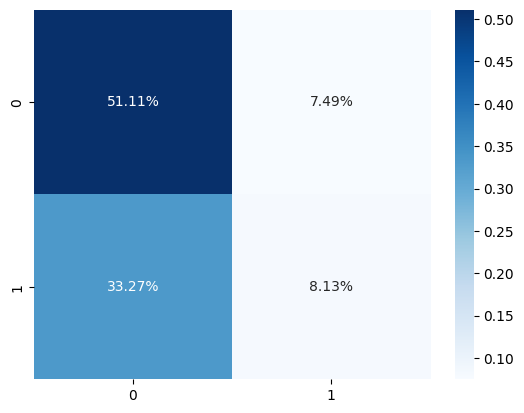

In [38]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot = True, fmt = '0.2%', cmap = 'Blues')

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.87      0.71       634
           1       0.52      0.20      0.29       448

    accuracy                           0.59      1082
   macro avg       0.56      0.53      0.50      1082
weighted avg       0.57      0.59      0.54      1082



In [40]:
precision_gnb = 0.52
recall_gnb = 0.20
f1_score_gnb = 0.29

1. O Modelo previu que 52% das amostras de água são potáveis;
2. De todos as amostras de água que realmente era potável, o modelo só previu esse resultado corretamente para 20% deles;
3. F1-score = 0.29, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não;
4. 634 amostras de água não são potáveis e 448 são potáveis nos dados de teste.

##### Regressão Logística

In [41]:
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez
250,1.654884,-1.538083,-1.008935,1.467103,0.221630,2.059774,-1.716796,0.717269,-0.117423
251,1.373837,-2.076756,-0.245735,0.564899,0.099168,0.308598,0.146899,0.476803,0.023664
252,-0.107742,-0.802885,0.158493,0.882875,-1.043076,0.610907,-0.411428,-0.973561,-1.562900
253,-0.113850,1.388257,1.953788,1.503255,-1.226979,-0.615610,-0.862394,0.476755,-0.143344
254,0.136257,0.214129,-0.183979,0.353496,-0.054184,-1.369296,0.075141,0.516523,-0.034463


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 0)

In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [44]:
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200)

In [45]:
LR = round(accuracy_score(y_train, lr.predict(X_train_std)),2)
LR

0.6

In [46]:
score_lr = cross_val_score(lr, X, y, cv = 10)
score_lr

array([0.60060976, 0.61280488, 0.61280488, 0.61890244, 0.61280488,
       0.56402439, 0.59327217, 0.60856269, 0.6146789 , 0.59938838])

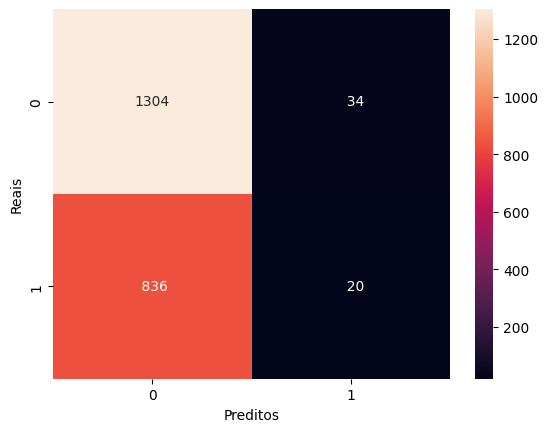

In [47]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

In [48]:
# verificamos que as proporções da variável target no treino e teste são correspondentes
y_train.mean(), y_test.mean()

(0.390154968094804, 0.3900184842883549)

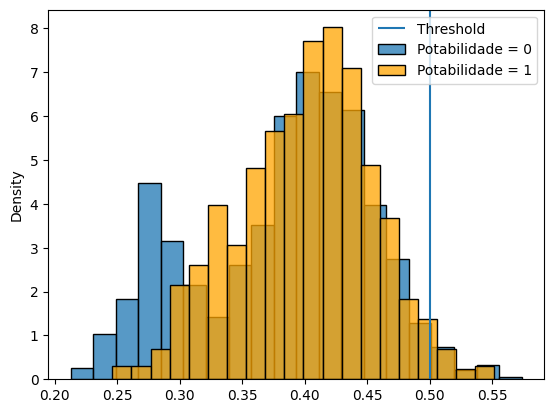

In [49]:
# Histograma de probabilidades
sns.histplot(data = lr.predict_proba(X_train_std[y_train == 0])[ : , 1], 
             stat = 'density'
            )

sns.histplot(data = lr.predict_proba(X_train_std[y_train == 1])[ : , 1], 
             stat = 'density', 
             color = 'orange'
            )
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Threshold', 'Potabilidade = 0', 'Potabilidade = 1']);

In [50]:
threshold = 0.45
probs = lr.predict_proba(X_train_std)[:,1]
y_pred = probs > threshold

In [51]:
accuracy_score(y_train, y_pred)


0.5793072014585232

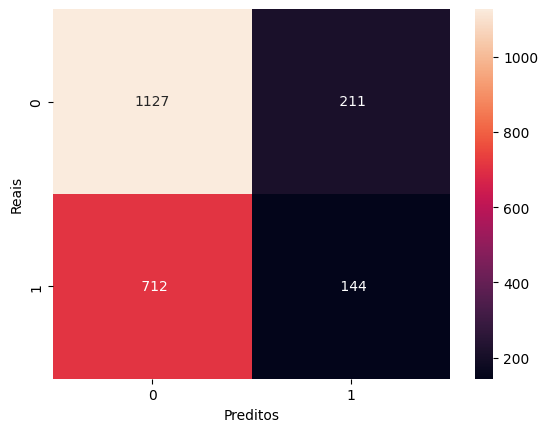

In [52]:
sns.heatmap(confusion_matrix(y_train, y_pred), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

In [53]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1338
           1       0.41      0.17      0.24       856

    accuracy                           0.58      2194
   macro avg       0.51      0.51      0.47      2194
weighted avg       0.53      0.58      0.53      2194



In [54]:
precision_lr = 0.41
recall_lr = 0.17
f1_score_lr = 0.24

1. O Modelo previu que 41% das amostras de água são potáveis;
2. De todos as amostras de água que realmente era potável, o modelo só previu esse resultado corretamente para 17% deles;
3. F1-score = 0.24, como não é muito próximo de 1, isso nos diz que o modelo faz um trabalho ruim ao prever se a água é potável ou não;
4. 1338 amostras de água não são potáveis e 856 são potáveis nos dados de teste.

##### Árvore de Decisão (Decision Tree)

In [108]:
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez
250,1.654884,-1.538083,-1.008935,1.467103,0.221630,2.059774,-1.716796,0.717269,-0.117423
251,1.373837,-2.076756,-0.245735,0.564899,0.099168,0.308598,0.146899,0.476803,0.023664
252,-0.107742,-0.802885,0.158493,0.882875,-1.043076,0.610907,-0.411428,-0.973561,-1.562900
253,-0.113850,1.388257,1.953788,1.503255,-1.226979,-0.615610,-0.862394,0.476755,-0.143344
254,0.136257,0.214129,-0.183979,0.353496,-0.054184,-1.369296,0.075141,0.516523,-0.034463


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [110]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [111]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [112]:
y_pred = dtree.predict(X_test_std)

In [113]:
dt = round(accuracy_score(y_test, y_pred),2)
dt

0.75

In [114]:
score_dtree = cross_val_score(dtree, X, y, cv = 10)
score_dtree

array([0.75304878, 0.72560976, 0.72256098, 0.7195122 , 0.7195122 ,
       0.74695122, 0.71865443, 0.74617737, 0.71559633, 0.74006116])

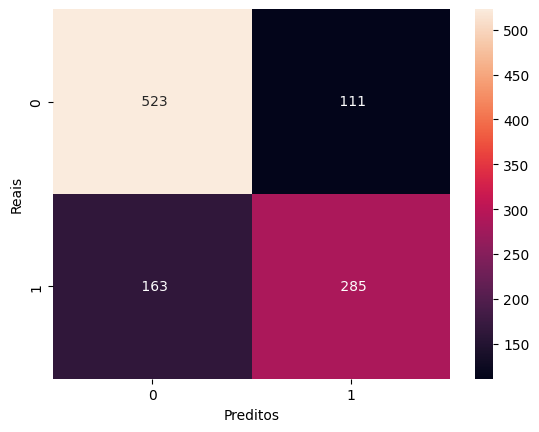

In [115]:
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

<AxesSubplot:>

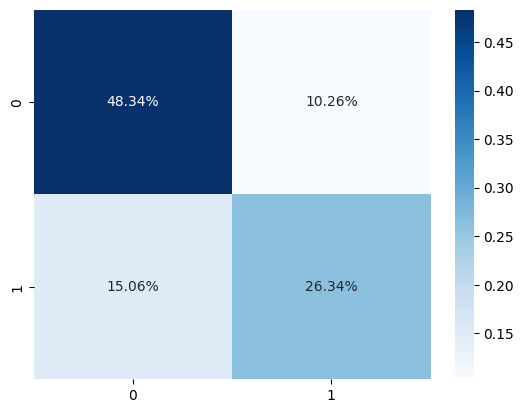

In [116]:
dtree_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(dtree_cm/np.sum(dtree_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [117]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       634
           1       0.72      0.64      0.68       448

    accuracy                           0.75      1082
   macro avg       0.74      0.73      0.73      1082
weighted avg       0.74      0.75      0.74      1082



In [118]:
precision_dtree = 0.72
recall_dtree = 0.64
f1_score_dtree = 0.68

1. O Modelo previu que 72% das amostras de água são potáveis;
2. De todos as amostras de água que realmente era potável, o modelo só previu esse resultado corretamente para 64% deles;
3. F1-score = 0.68, como é quase perto de 1, da para falar que é  um bom modelo para prever se a água é potável ou não;
4. 634 amostras de água não são potáveis e 448 são potáveis nos dados de teste.

##### AdaBoost

In [76]:
sc = StandardScaler()
# matriz de variáveis explicativas
X = Data.drop('Potabilidade', axis = 1)

# variável target
y = Data.Potabilidade


features = X.columns
X[features] = sc.fit_transform(X[features])
X.head()

,ph,Dureza,Sólidos,Cloraminas,Sulfato,Condutividade,Carbono organico,Trialometanos,Turbidez
250,1.654884,-1.538083,-1.008935,1.467103,0.221630,2.059774,-1.716796,0.717269,-0.117423
251,1.373837,-2.076756,-0.245735,0.564899,0.099168,0.308598,0.146899,0.476803,0.023664
252,-0.107742,-0.802885,0.158493,0.882875,-1.043076,0.610907,-0.411428,-0.973561,-1.562900
253,-0.113850,1.388257,1.953788,1.503255,-1.226979,-0.615610,-0.862394,0.476755,-0.143344
254,0.136257,0.214129,-0.183979,0.353496,-0.054184,-1.369296,0.075141,0.516523,-0.034463


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 0)

In [78]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [79]:
model = abc.fit(X_train, y_train)

In [80]:
y_pred = model.predict(X_test)

In [81]:
ABC = round(accuracy_score(y_test, y_pred),2)
ABC

0.74

In [82]:
score_cvabc = cross_val_score(abc, X, y, cv = 10)
score_cvabc.mean()

0.740518945327068

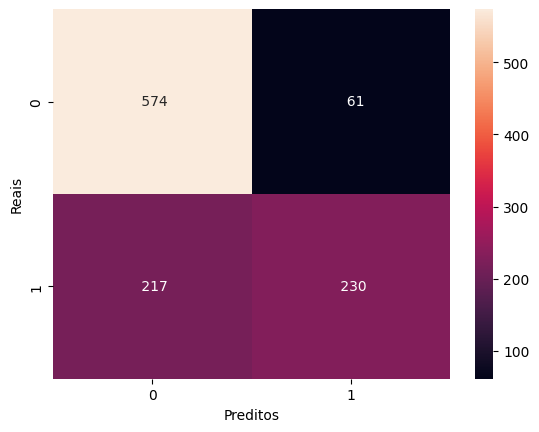

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Preditos')
plt.ylabel('Reais');

<AxesSubplot:>

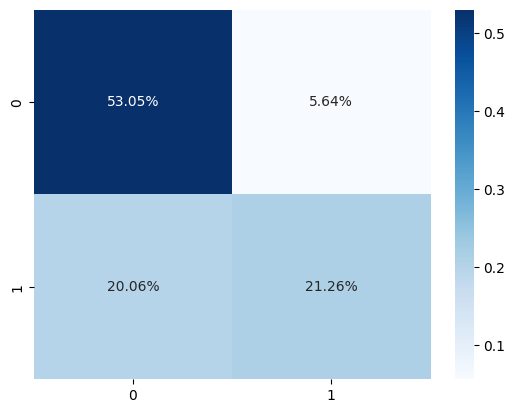

In [84]:
abc_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(abc_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [85]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       635
           1       0.79      0.51      0.62       447

    accuracy                           0.74      1082
   macro avg       0.76      0.71      0.71      1082
weighted avg       0.75      0.74      0.73      1082



1. O Modelo previu que 79% das amostras de água são potáveis;
2. De todos as amostras de água que realmente era potável, o modelo só previu esse resultado corretamente para 51% deles;
3. F1-score = 0.62, como é quase perto de 1, da para falar que é  um bom modelo para prever se a água é potável ou não;
4. 635 amostras de água não são potáveis e 447 são potáveis nos dados de teste.

In [86]:
precision_abc = 0.79
recall_abc = 0.51
f1_score_abc = 0.62 

### Comparando os Modelos

In [86]:
modelos = [
       [KNeighborsClassifier(), KNN, round(score_knn.mean(),2), precision_knn, recall_knn, f1_score_knn ],
       [GaussianNB(), GNB, round(score_gnb.mean(),2), precision_gnb, recall_gnb, f1_score_gnb],
       [LogisticRegression(), LR, round(score_lr.mean(),2), precision_lr, recall_lr, f1_score_lr],
       [DecisionTreeClassifier(),dt,round(score_dtree.mean(),2), precision_dtree, recall_dtree, f1_score_dtree],
       [AdaBoostClassifier(),ABC, round(score_cvabc.mean(),2), precision_abc, recall_abc, f1_score_abc]
       ]

df = pd.DataFrame(modelos, columns=['Modelo', 'Accuracy score', 'cross validation','precision','recall','f1 score'])
df
df.sort_values(by=['Accuracy score'], ascending=True).style.background_gradient(subset=['Accuracy score'])

,Modelo,Accuracy score,cross validation,precision,recall,f1 score
1,GaussianNB(),0.590000,0.590000,0.520000,0.200000,0.290000
2,LogisticRegression(),0.600000,0.600000,0.410000,0.170000,0.240000
0,KNeighborsClassifier(),0.670000,0.670000,0.720000,0.340000,0.460000
4,AdaBoostClassifier(),0.740000,0.740000,0.790000,0.510000,0.620000
3,DecisionTreeClassifier(),0.750000,0.730000,0.720000,0.640000,0.680000


* Com todas as especificações dos modelos, além da cross validation, accuracy score, também temos: precision, recall, f1-score. Dito isso, o melhor modelo a ser usado é a Árvore de Decisão. O cross validation e o accuracy score são um pouco pior que o dos outros, porém o precision, recall e a f1- score são muito melhores que dos outros.